In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import utils

In [3]:
n=20000
p=1
q=1

In [4]:
def points_within_distance(point, n,p):
    x, y = point
    flag=1
    points = []
    for i in range(x - p, x + p + 1):
        for j in range(y - p, y + p + 1):
            if (i != x or j != y) and manhattan_pro(point, (i, j), n) <= p:
                if i<0:
                    flag=0
                if j<0:
                    flag=0
                if i>=n:
                    flag=0
                if j>=n:
                    flag=0
                if flag==1:
                    points.append([i, j])
                else:
                    flag=1
    return points

def points_in_distance(point, n, dist):
    x, y = point
    candidates=[[x-dist,y],[x, y+dist],[x+dist,y],[x, y-dist]]
    candidates_2=[]
    for i in range(len(candidates)):
        if candidates[i][0]<0:
            continue
        if candidates[i][1]<0:
            continue
        if candidates[i][0]>=n:
            continue
        if candidates[i][1]>=n:
            continue
        candidates_2.append(candidates[i])
    return candidates_2


"""poiint_i=(a1,b1), point_j=(a2,b2), n is the size of the network"""
def manhattan_pro(point_i, point_j, n):
    x1, y1 = point_i
    x2, y2 = point_j
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    # dx = min(dx, n - dx)  
    # dy = min(dy, n - dy) 
    return dx + dy

"""Generate the distribution array for the long range connection"""
def generate_distribution_array(n,p,r):
    dist=n
    distribution=[]
    distance=[]
    for i in range(p+1, dist+1):
        distribution.append(1/(i)**r)
        distance.append(i)
    distribution=np.array(distribution)/sum(distribution)
    return distribution, distance


def cal_reachable_pt(point, r, n, p,distribution_array,distace):
    """calculate short range reachable points"""
    index_1 =points_within_distance(point=point,n=n,p=p)
    """calculate long range reachable points"""
    flag=0
    while flag!=1:
        long_dist=np.random.choice(distace, p=distribution_array)
        point_candidates=points_in_distance(point, n, long_dist)
        if len(point_candidates)!=0:
            flag=1
            index_2 = [random.choice(point_candidates)]
            return np.array(index_1 + index_2)
        # else:print('again',long_dist)

def next_point(point, r, destination, n, p,distribution_array,distace):
    index = cal_reachable_pt(point, r, n, p,distribution_array,distace)
    lengths = [manhattan_pro(point_i, destination, n) for point_i in index]
    return index[np.argmin(lengths)]


In [5]:
points_in_distance([10,10], n, 20)

[[10, 30], [30, 10]]

In [30]:
#: testing
average_all=[]
# for i in tqdm(range(90)):# 绘制图 范围从0~3 每隔0.1 绘制一个点
for r in [0,0.5,1]:
    average=[]

    temp=[]
    distance_list=[]
    distribution_array,distace=generate_distribution_array(n,p,r)
    for j in tqdm(range(1)): # 每个r绘制20次
        point=[0,0]
        destination=[19999,19999]
        step=0
        while (np.array_equal(point, destination)==False):
            distance_list.append(manhattan_pro(point, destination, n))
            point=next_point(point=point,r=r,destination=destination,n=n,p=p,distribution_array=distribution_array,distace=distace)
            step+=1
        temp.append(step)
    average.append(np.average(temp))
    average_all.append(distance_list)


100%|██████████| 1/1 [00:00<00:00, 11.17it/s]


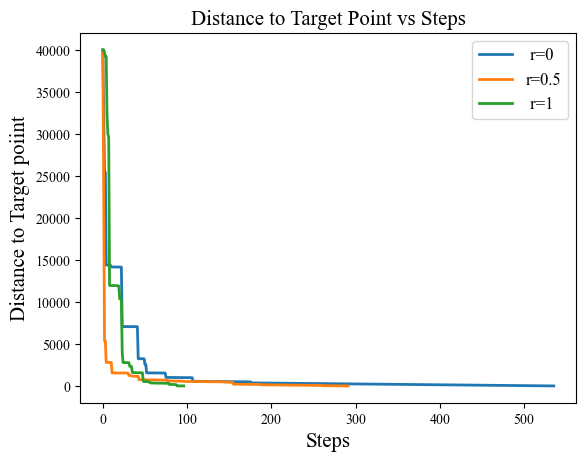

In [37]:
plt.rcParams['font.family'] = ['Times New Roman']
plt.plot(average_all[0], label=' r=0 ',linewidth=2)

plt.plot(average_all[1], label='r=0.5',linewidth=2)
plt.plot(average_all[2], label=' r=1 ',linewidth=2)
# plt.plot(average_all[2], label='r=2')
# plt.plot(average_all[3], label='r=3')


plt.ylabel('Distance to Target poiint', fontsize=15)
plt.xlabel('Steps', fontsize=15)
plt.title('Distance to Target Point vs Steps',fontsize=15)
plt.legend(fontsize=12)

In [38]:
#: testing
average_all=[]
# for i in tqdm(range(90)):# 绘制图 范围从0~3 每隔0.1 绘制一个点
for r in [1,1.5,2,2.5,3]:
    average=[]

    temp=[]
    distance_list=[]
    distribution_array,distace=generate_distribution_array(n,p,r)
    for j in tqdm(range(1)): # 每个r绘制20次
        point=[0,0]
        destination=[19999,19999]
        step=0
        while (np.array_equal(point, destination)==False):
            distance_list.append(manhattan_pro(point, destination, n))
            point=next_point(point=point,r=r,destination=destination,n=n,p=p,distribution_array=distribution_array,distace=distace)
            step+=1
        temp.append(step)
    average.append(np.average(temp))
    average_all.append(distance_list)


100%|██████████| 1/1 [00:30<00:00, 30.36s/it]


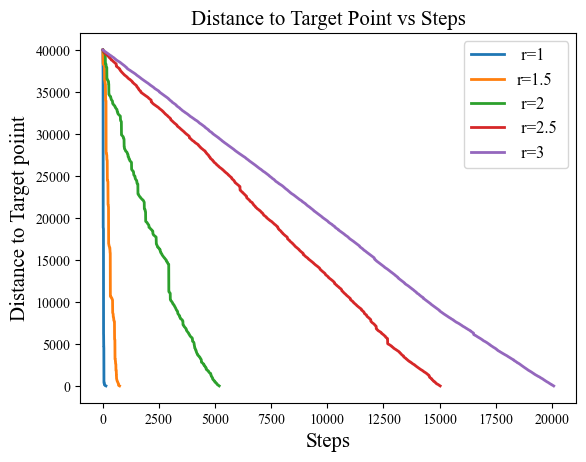

In [39]:
plt.rcParams['font.family'] = ['Times New Roman']
plt.plot(average_all[0], label=' r=1 ',linewidth=2)

plt.plot(average_all[1], label='r=1.5',linewidth=2)
plt.plot(average_all[2], label=' r=2 ',linewidth=2)
plt.plot(average_all[3], label=' r=2.5 ',linewidth=2)
plt.plot(average_all[4], label=' r=3 ',linewidth=2)
# plt.plot(average_all[2], label='r=2')
# plt.plot(average_all[3], label='r=3')


plt.ylabel('Distance to Target poiint', fontsize=15)
plt.xlabel('Steps', fontsize=15)
plt.title('Distance to Target Point vs Steps',fontsize=15)
plt.legend(fontsize=12)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
from utils import *

all_steps=[]
for p in [1,2,3,4,5]:
    n=20000
    r=1
    average=[]
    print(n)
    for q in tqdm([1,2,3,4,5,6,7,8,9,10]):# 绘制图 范围从0~3 每隔0.1 绘制一个点
        # i=i/40
        temp=[]
        distribution_array,distace=generate_distribution_array(n,p,r)
        for j in (range(50)): # 每个r绘制10次
            # point=np.random.randint(0, n, size=2)
            # destination=np.random.randint(0, n, size=2)
            point=[0,0]  # 采用稳定输入
            destination=[n-1,n-1]
            step=0
            while (np.array_equal(point, destination)==False):
                point=next_point(point=point,r=r,destination=destination,n=n,p=p,q=q,distribution_array=distribution_array,distace=distace)
                step+=1
            temp.append(step)
        average.append(np.average(temp))
    all_steps.append(average)
    # print(average)

20000


100%|██████████| 10/10 [01:53<00:00, 11.34s/it]


20000


100%|██████████| 10/10 [03:43<00:00, 22.33s/it]


20000


100%|██████████| 10/10 [02:23<00:00, 14.38s/it]


20000


100%|██████████| 10/10 [02:28<00:00, 14.83s/it]


20000


100%|██████████| 10/10 [02:57<00:00, 17.77s/it]


In [10]:
all_steps

[[170.0, 91.3, 69.5, 60.0, 43.5, 44.6, 36.2, 35.1, 33.0, 26.7]]

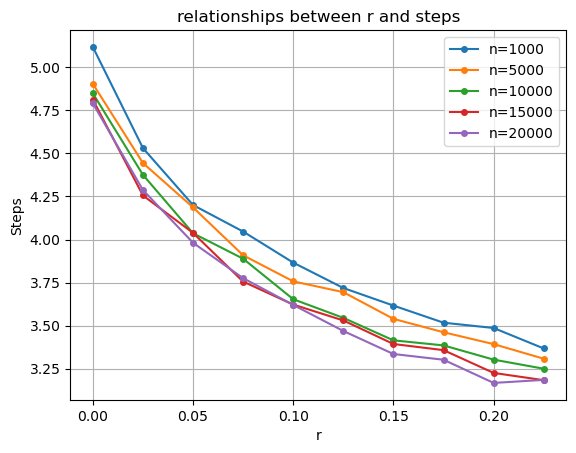

In [15]:
x = np.arange(len(average))/40
y = np.log(all_steps[0])

# 绘制折线图
plt.plot(x, np.log(all_steps[0]), marker='o',markersize=4,label='p=1')  # 使用'o'标记绘制每个点
plt.plot(x, np.log(all_steps[1]), marker='o',markersize=4,label='n=2')  # 使用'o'标记绘制每个点
plt.plot(x,  np.log(all_steps[2]), marker='o',markersize=4,label='n=3')  # 使用'o'标记绘制每个点
plt.plot(x,  np.log(all_steps[3]), marker='o',markersize=4,label='n=4')  # 使用'o'标记绘制每个点
plt.plot(x,  np.log(all_steps[4]), marker='o',markersize=4,label='n=5')  # 使用'o'标记绘制每个点


plt.title('relationships between r and steps')
plt.xlabel('r')
plt.ylabel('Steps')
plt.grid(True)  # 显示网格
plt.legend()
plt.show()

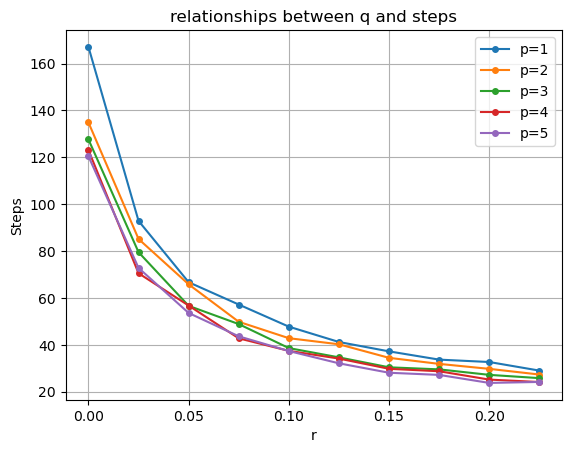

In [17]:
x = np.arange(len(average))/40
y = np.log(all_steps[0])

# 绘制折线图
plt.plot(x, (all_steps[0]), marker='o',markersize=4,label='p=1')  # 使用'o'标记绘制每个点
plt.plot(x, (all_steps[1]), marker='o',markersize=4,label='p=2')  # 使用'o'标记绘制每个点
plt.plot(x,  (all_steps[2]), marker='o',markersize=4,label='p=3')  # 使用'o'标记绘制每个点
plt.plot(x,  (all_steps[3]), marker='o',markersize=4,label='p=4')  # 使用'o'标记绘制每个点
plt.plot(x,  (all_steps[4]), marker='o',markersize=4,label='p=5')  # 使用'o'标记绘制每个点


plt.title('relationships between q and steps')
plt.xlabel('r')
plt.ylabel('Steps')
plt.grid(True)  # 显示网格
plt.legend()
plt.show()